In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('wine.data', header=None)
target = df[[0]]
X = df.drop(0, axis=1)

In [24]:
def myFunc(X, target, maxKNeighbors=51, minKNeighbors=1):
    outDict = dict()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for i in range(minKNeighbors, maxKNeighbors + 1):
        KNC = KNeighborsClassifier(n_neighbors=i)
        cvs = cross_val_score(KNC, X, target, cv=kf, scoring='accuracy')
        outDict[i] = cvs.mean()
    return outDict

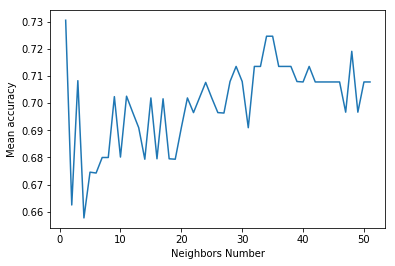

Max accuracy =  0.7304761904761905
Optimum Neighbors Number =  1


In [30]:
# KNN без нормировки признаков

a = myFunc(X, target, maxKNeighbors=51, minKNeighbors=1)

# График

plt.plot(list(a.keys()), list(a.values()))
plt.ylabel('Mean accuracy')
plt.xlabel('Neighbors Number')
plt.show()

print('Max accuracy = ', max(list(a.values())))
print('Optimum Neighbors Number = ', list(a.keys())[list(a.values()).index(max(list(a.values())))])

# Запись ответа
output1 = open('1_1qw.txt', 'w')
print(
    list(a.keys())[list(a.values()).index(max(list(a.values())))],
    file=output1, 
    end='', 
    sep=' '
)
output1.close()

output1 = open('1_2qw.txt', 'w')
print(
    round(max(list(a.values())), 2), 
    file=output1, 
    end='', 
    sep=' '
)
output1.close()

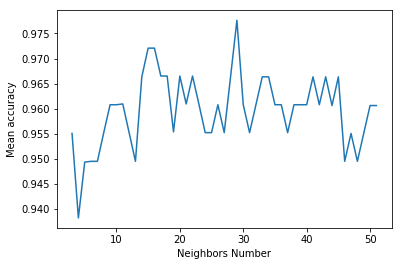

Max accuracy =  0.9776190476190475
Optimum Neighbors Number =  29


In [31]:
# KNN с нормировкой признаков

b = myFunc(scale(X, axis=0), target, maxKNeighbors=51, minKNeighbors=3)

# График

plt.plot(list(b.keys()), list(b.values()))
plt.ylabel('Mean accuracy')
plt.xlabel('Neighbors Number')
plt.show()

print('Max accuracy = ', max(list(b.values())))
print('Optimum Neighbors Number = ', list(b.keys())[list(b.values()).index(max(list(b.values())))])

# Запись ответа
output2 = open('2_1qw.txt', 'w')
print(
    list(b.keys())[list(b.values()).index(max(list(b.values())))],
    file=output2, 
    end='', 
    sep=' '
)
output2.close()

output2 = open('2_2qw.txt', 'w')
print(
    round(max(list(b.values())), 2), 
    file=output2, 
    end='', 
    sep=' '
)
output2.close()